# <center>Simple Linear Regression</center>

#### OLS

In [104]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        10:01:25   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# y = B1x+B0
np.polyfit(X, y, deg=1)

In [106]:
potential_spend = np.linspace(0, 500, 100)

In [107]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

In [110]:
df['total_spend'] = df['TV'] + df['newspaper'] + df['radio']

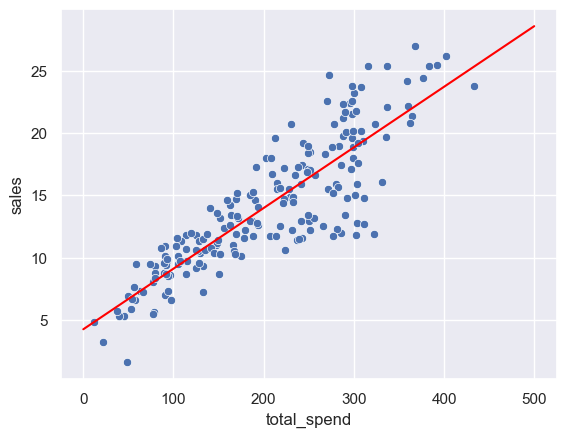

In [111]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color='red') #, sns.regplot(data=df, x='total_spend', y='sales')

**If our next advertising campaign is gonna be 200,000$ so how many units are expected in sale?**

In [112]:
spend = 200
predicted_sale = 0.04868788*spend + 4.24302822
predicted_sale

13.98060422

**np.polyfit() can work with higher degree polynomial**

For Example:
$$
y = B_3x^3 + B_2x^2 + B_1x + B_0
$$


In [ ]:
np.polyfit(X, y, deg=3)

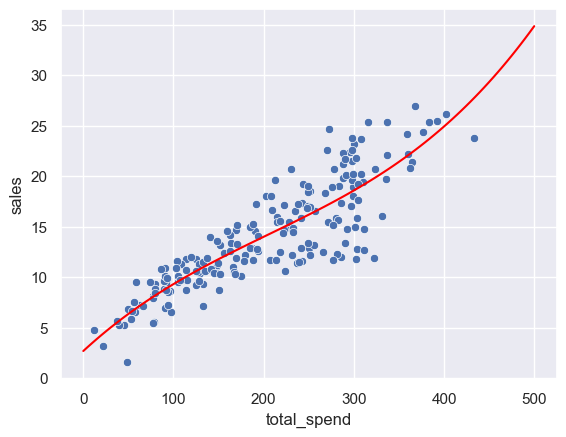

In [114]:
# Lets use this new higher order equation
pred_sales = (potential_spend**3) * 3.07615033e-07 + (potential_spend**2) * -1.89392449e-04 + (potential_spend) * 8.20886302e-02 + 2.70495053e+00
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, pred_sales, color='red') #, sns.regplot(data=df, x='total_spend', y='sales')

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime
import os
sns.set()

---
---


## <center>Linear Regression with SciKit-Learn</center>

- Previously, we explored "Is there a relationship between *total* advertising spend and *sales*?"
- Now we expand this to "What is the relationship between each *(TV, Radio, Newspaper)* and *sales*?"

also, let's greatly expand our toolkit to start thinking about the considerations of overfitting, underfitting, model evaluation, as well as multiple features!

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


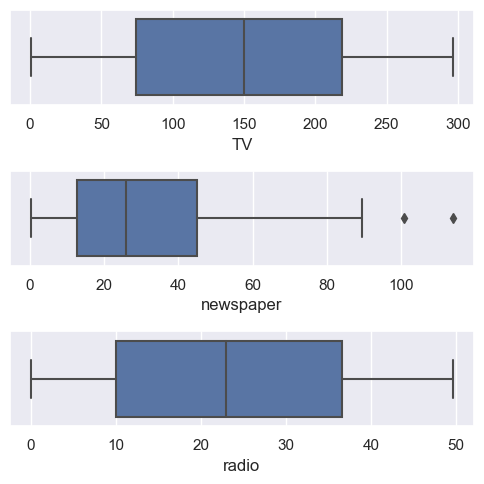

In [3]:
# Outlier Analysis

fig, axs = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(x=df['TV'], ax=axs[0], orient='h')
plt2 = sns.boxplot(x=df['newspaper'], ax=axs[1], orient='h')
plt3 = sns.boxplot(x=df['radio'], ax=axs[2], orient='h')
plt.tight_layout()

plt.show()

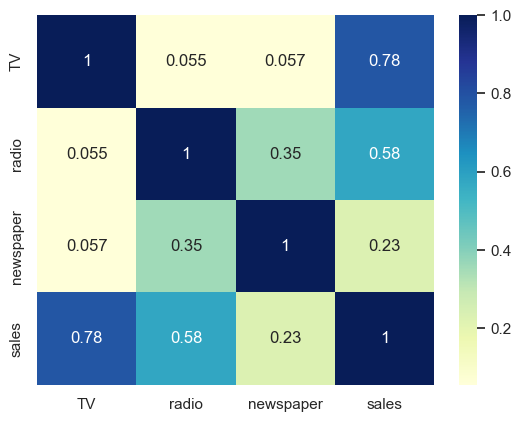

In [4]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Multiple Features (N-Dimensional)

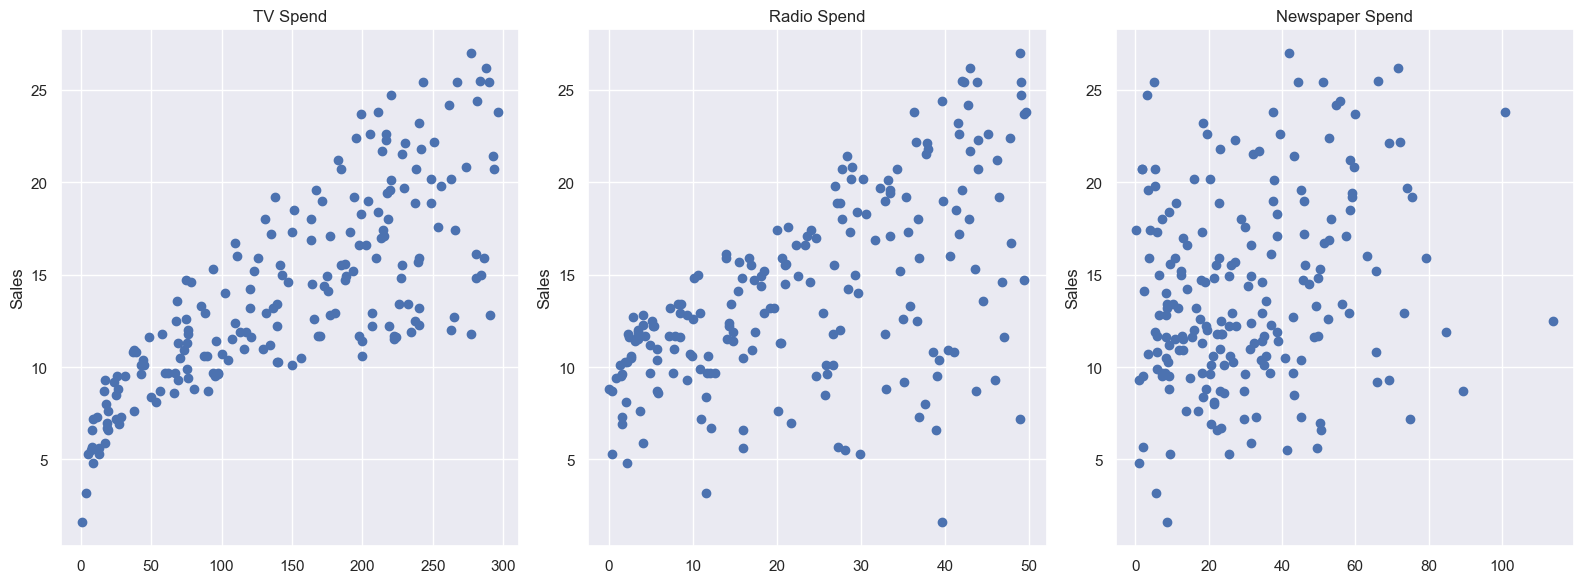

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout()

Visually we can already see that *TV* and *Radio* do have some positive corelation

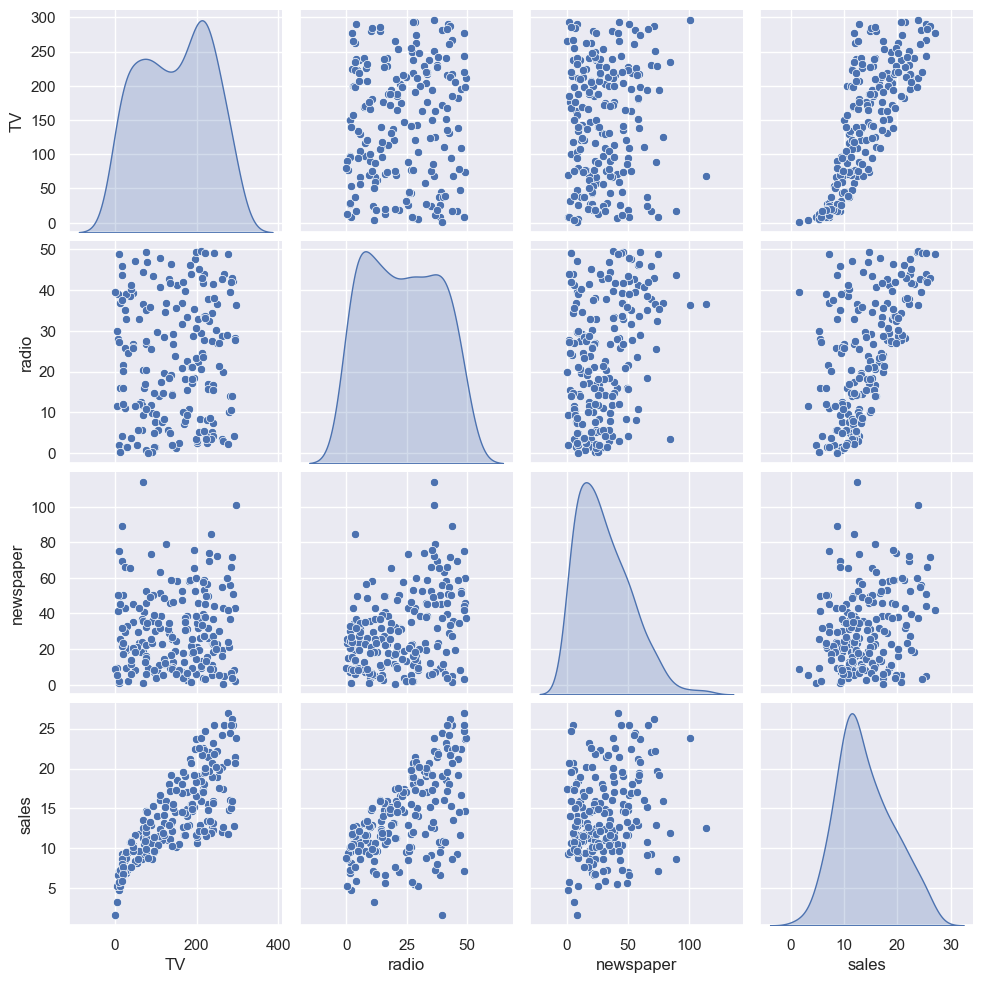

In [6]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

In [102]:
X = df.drop(['sales'], axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [103]:
y = df['sales']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
display(X_train)
display(X_test)
display(y_train)
display(y_test)

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

In [12]:
# Import a model class from a model family
from sklearn.linear_model import LinearRegression

In [13]:
# Create an instance of the model with parameters
model = LinearRegression()

**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

In [14]:
# Fit/Train the Model on the training data
model.fit(X_train,y_train)

LinearRegression()

In [15]:
test_predictions = model.predict(X_test)
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

Now that we have a fitted model that can preform predictions based on features, *How do we decide if they are any good?* 

**Fortunately we have the known test labels to compare our results to.**


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors

**Mean Squared Error** (MSE) is the mean of the squared errors

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors

All of these are **loss functions**, because we want to minimize them.

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [17]:
MAE = mean_absolute_error(y_test,test_predictions) 
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'Mean Sales'],
    'Value': [MAE, MSE, RMSE, df['sales'].mean()]
})
results

,Metric,Value
0,MAE,1.213746
1,MSE,2.298717
2,RMSE,1.516152
3,Mean Sales,14.022500


<Axes: xlabel='sales', ylabel='Count'>

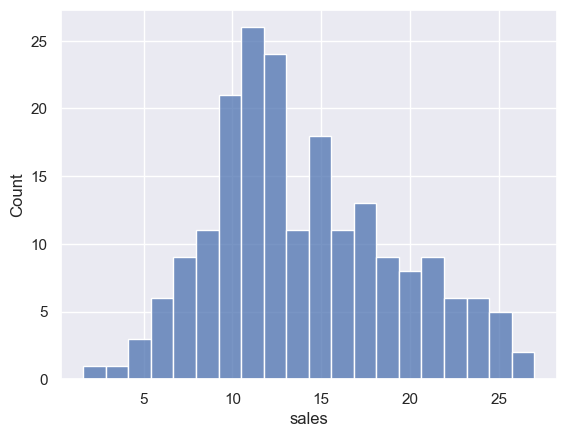

In [18]:
sns.histplot(data=df, x='sales', bins=20)

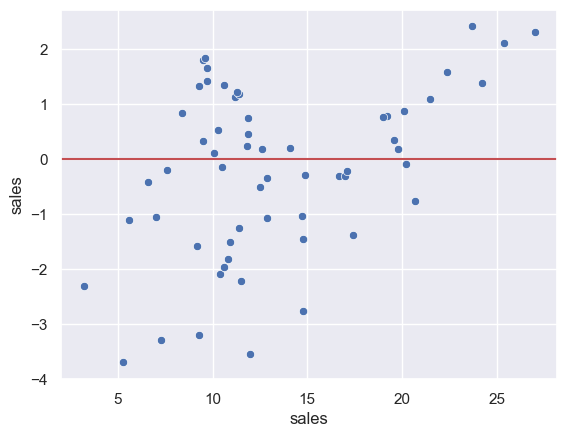

In [19]:
# Doing residuals separately will alert us to any issue with the split call
test_residuals = y_test - test_predictions
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0, color='r', linestyle='-')

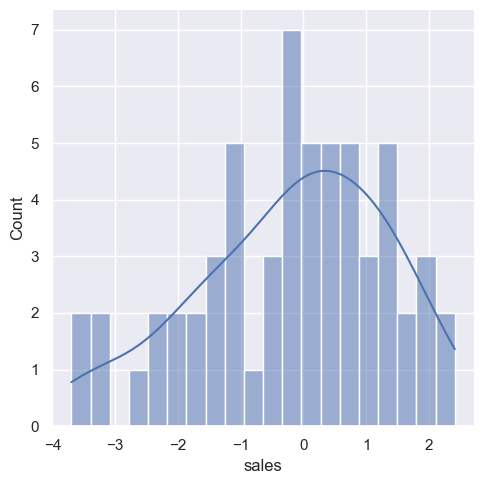

In [20]:
sns.displot(test_residuals,bins=20,kde=True)

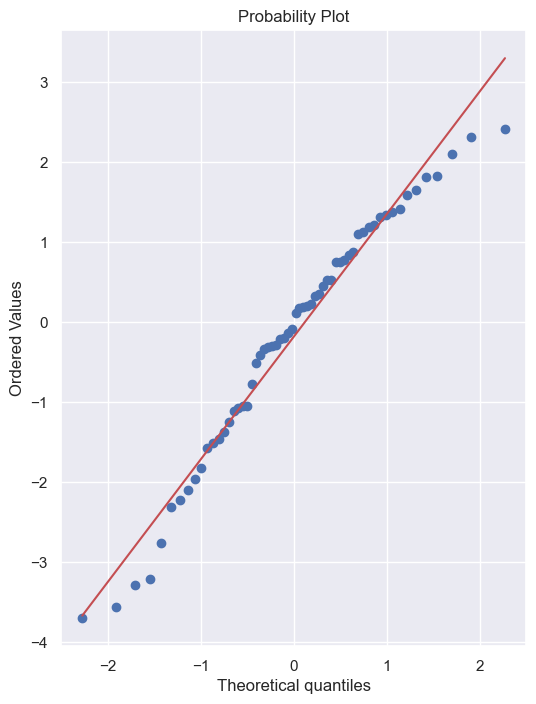

In [21]:
# Still unsure if normality is a reasonable approximation? 
# We can check against the [normal probability plot.]

import scipy as sp

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

-------
--------

### Retraining Model on Full Data

In [22]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [23]:
display(final_model.coef_)
X.head(1)

array([ 0.04576465,  0.18853002, -0.00103749])

,TV,radio,newspaper
0,230.1,37.8,69.2


In [24]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


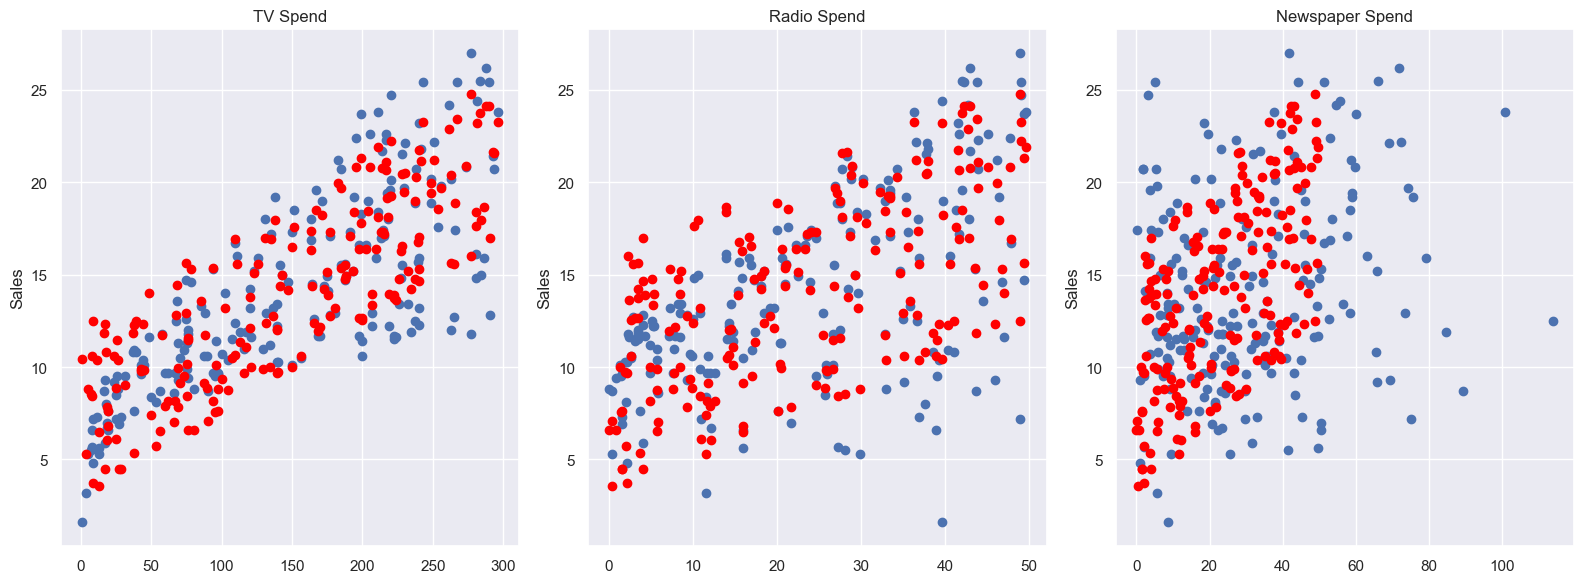

In [25]:
# Final Model Fit
y_hat = final_model.predict(X)
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout()

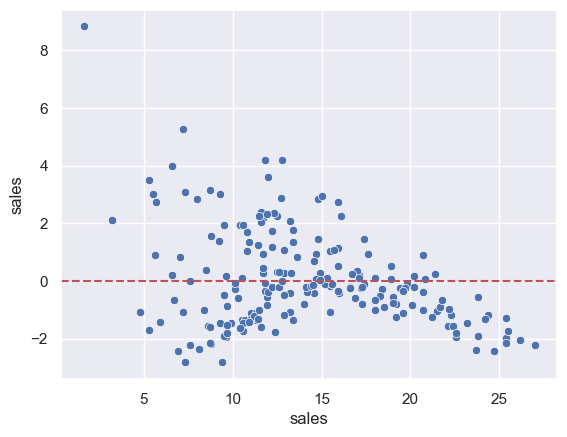

In [26]:
residuals = y_hat - y
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

**149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [27]:
X.head(0)

,TV,radio,newspaper


In [28]:
# Prediction on New Data
campaign = [[149,22,12]]
final_model.predict(campaign)

/Users/anasr/opt/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

### Deployment, Predictions, and Model Attributes

In [29]:
from joblib import dump, load

In [30]:
dump(final_model, 'sales_model.joblib')

['sales_model.joblib']

In [31]:
loaded_model = load('sales_model.joblib')

In [32]:
display(X.head(0))
campaign

,TV,radio,newspaper


[[149, 22, 12]]

In [33]:
loaded_model.predict(campaign)

/Users/anasr/opt/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

-------
--------

## <center>Polynomial Regression with SciKit-Learn</center>

<center>let's greatly expand our toolkit to start thinking about the considerations of overfitting, underfitting, model evaluation, as well as multiple features!</center>

Lets consider *interaction terms* ... What if features are only significant when in sync with one another.
* Perhaps newspaper advertising spend by it self is not effective, but greatly increase effectiveness if added to a TV advertising campaign. 

**<center>How can we check for this?</center>**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

In [34]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [35]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [36]:
y.to_frame()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [39]:
# Converter "fit" to data, in this case, reads in every X column
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [40]:
# Then "transforms" and ouputs the new polynomial data
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [41]:
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features = polynomial_converter.fit_transform(X)

In [42]:
X.shape, poly_features.shape

((200, 3), (200, 9))

The interaction terms $$x_1  \cdot x_2 \text{  and  } x_1  \cdot x_3 \text{  and  }   x_2  \cdot x_3 $$

In [43]:
X.iloc[0], poly_features[0]

(TV           230.1
 radio         37.8
 newspaper     69.2
 Name: 0, dtype: float64,
 array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
        8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
        4.788640e+03]))

In [44]:
# Train | Test Split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.linear_model import LinearRegression
# Create an instance of the model with parameters
model = LinearRegression(fit_intercept=True)

In [46]:
# Fit/Train the Model on the training data
model.fit(X_train,y_train)

LinearRegression()

In [47]:
# Evaluation on the Test Set
test_predictions = model.predict(X_test)

In [48]:
MAE = mean_absolute_error(y_test,test_predictions) 
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'Mean Sales'],
    'Value': [MAE, MSE, RMSE, df['sales'].mean()]
})
results

,Metric,Value
0,MAE,0.489680
1,MSE,0.441751
2,RMSE,0.664643
3,Mean Sales,14.022500


In [49]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 1.1244
    * RMSE: 1.4364
* Polynomial 2-degree:
    * MAE: 0.4431
    * RMSE: 0.5809

### Choosing a Model

let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

* Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [50]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [51]:
pd.DataFrame({'Train RMSE Errors': train_rmse_errors, 'Test RMSE Errors': test_rmse_errors}, index=range(1, len(train_rmse_errors)+1))

,Train RMSE Errors,Test RMSE Errors
1,1.734594,1.516152
2,0.587957,0.664643
3,0.433934,0.580329
4,0.351708,0.507774
5,0.250934,2.575824
6,0.193953,4.270900
7,5.422149,1378.578012
8,0.145649,3881.453737
9,0.168350,90726.257478


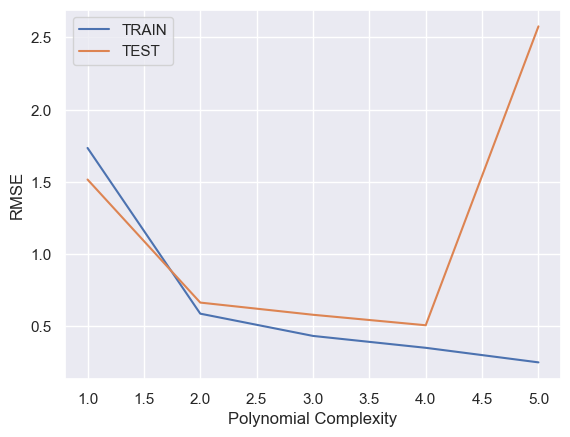

In [52]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

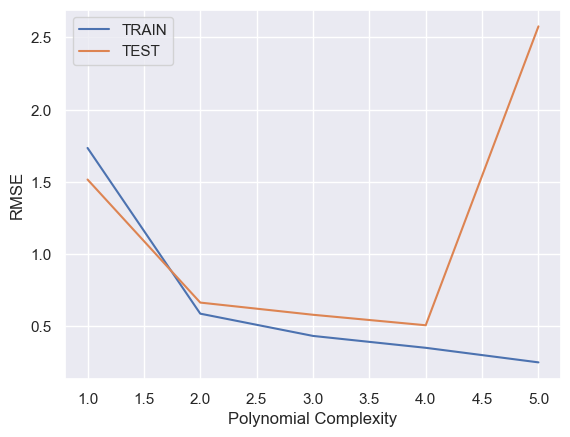

In [53]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

So should we choose degree of *3* or *4*? 

We get a better error using degree of 4 thats for sure but Logically if we think about the added complexity is it worth the risk to add complexity where there is a good 3rd degree interaction term. *Heres where domain knowledge Comes into play*

**I would recommend to go for 2nd degree or 3rd degree at most**

### Finalizing Model Choice


In [54]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [55]:
final_model = LinearRegression()
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [56]:
dump(final_model, 'sales_poly_model.joblib') 

['sales_poly_model.joblib']

In [57]:
# Recall that we will need to "convert" any incoming data to polynomial data
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

**149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [58]:
# Prediction on New Data
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [59]:
campaign = [[149,22,12]]

In [60]:
campaign_poly = loaded_poly.transform(campaign)
campaign_poly

/Users/anasr/opt/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [61]:
final_model.predict(campaign_poly)

array([14.64501014])

## <center>Regularization with SciKit-Learn</center>

<center>we can be smarter about model choice and utilize regularization.</center>

- Let's explore two methods of regularization:

1- L2 Ridge Regression.

2- L1 Lasso Regression.

In [62]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [63]:
y.to_frame()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [64]:
# Polynomial Conversion
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [65]:
# Train | Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

### Scaling the Data


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
scaler.fit(X_train)

StandardScaler()

In [68]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### L2 Ridge Regression.

In [69]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10)

In [70]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [71]:
test_predictions = ridge_model.predict(X_test)

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'Mean Sales'],
    'Value': [MAE, MSE, RMSE, df['sales'].mean()]
})
results

,Metric,Value
0,MAE,0.577440
1,MSE,0.800378
2,RMSE,0.894639
3,Mean Sales,14.022500


##### Choosing an alpha value with Cross-Validation


In [73]:
from sklearn.linear_model import RidgeCV

In [74]:
from sklearn.metrics import SCORERS

In [75]:
# All metrics follow convention "Higher is better"
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [76]:
# Negative RMSE so all metrics follow convention "Higher is better"

# See all options: sklearn.metrics.SCORERS.keys()
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [77]:
# The more alpha options you pass, the longer this will take.
# Fortunately our data set is still pretty small
ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [78]:
ridge_cv_model.alpha_

0.1

In [79]:
test_predictions = ridge_cv_model.predict(X_test)

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'Mean Sales'],
    'Value': [MAE, MSE, RMSE, df['sales'].mean()]
})
results

,Metric,Value
0,MAE,0.427377
1,MSE,0.382013
2,RMSE,0.618072
3,Mean Sales,14.022500


In [81]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])


---

### L1 LASSO Regression

In [82]:
from sklearn.linear_model import LassoCV

In [83]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [84]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [85]:
lasso_cv_model.alpha_

0.49430709092258324

In [86]:
test_predictions = lasso_cv_model.predict(X_test)

In [87]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'Mean Sales'],
    'Value': [MAE, MSE, RMSE, df['sales'].mean()]
})
results

,Metric,Value
0,MAE,0.654172
1,MSE,1.278709
2,RMSE,1.130800
3,Mean Sales,14.022500


In [88]:
# Training Set Performance
train_predictions = lasso_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.6912807140820706

In [89]:
# How many values are considered in the LASSO model to geth these results? 
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

This came with a cost of a worst preforming model when it comes to MAE and RMSE but now the model is easier. But still pretty impressive getting these results considering only two features.

---

If we want we can get even better LASSO model by adjusting the eps and with more max iter. 

By that we giving it more time to search for those better alpha values. 

Its gonna consider more coefficient and slightly more complex model and still getting the benefits of not considering every single coefficient. 

In [90]:
lasso_cv_model = LassoCV(eps=0.001,n_alphas=100,cv=5, max_iter=1000000)
lasso_cv_model.fit(X_train,y_train)
print(lasso_cv_model.alpha_)
test_predictions = lasso_cv_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'Mean Sales'],
    'Value': [MAE, MSE, RMSE, df['sales'].mean()]
})
results

0.004943070909225833


,Metric,Value
0,MAE,0.433503
1,MSE,0.367617
2,RMSE,0.606314
3,Mean Sales,14.022500


In [91]:
lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

**It all depends on the trade off you are willing to make between how complex the model are VS model performance**


---

### Elastic Net

Elastic Net combines the penalties of ridge regression and lasso in an attempt to get the best of both worlds!

In [92]:
from sklearn.linear_model import ElasticNetCV

In [93]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [94]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [95]:
elastic_model.l1_ratio_

1.0

So the model says LASSO is the way to go

In [96]:
lasso_cv_model.alpha_

0.004943070909225833

In [97]:
elastic_model.alpha_

0.004943070909225833

In [98]:
test_predictions = elastic_model.predict(X_test)

In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'Mean Sales'],
    'Value': [MAE, MSE, RMSE, df['sales'].mean()]
})
results

,Metric,Value
0,MAE,0.566326
1,MSE,0.560334
2,RMSE,0.748555
3,Mean Sales,14.022500


In [100]:
# Training Set Performance
train_predictions = elastic_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.4307582990472368

In [101]:
elastic_model.coef_

array([ 3.78993643,  0.89232919,  0.28765395, -1.01843566,  2.15516144,
       -0.3567547 , -0.271502  ,  0.09741081,  0.        , -1.05563151,
        0.2362506 ,  0.07980911,  1.26170778,  0.01464706,  0.00462336,
       -0.39986069,  0.        ,  0.        , -0.05343757])

-------
--------

<details>
  <summary><strong>Done By</strong></summary>
  <p align="center">Ahmed NasrElDin</p>
</details>

-------
--------